<a href="https://colab.research.google.com/github/roy891030/202409myMasterThesis/blob/main/9_26%E6%8C%87%E6%A8%99%E6%98%AF%E7%AE%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 下載繪圖package

In [6]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.1 MB/s eta 0:00:00


In [1]:
from google.colab import files
# 上傳csv檔案
uploaded = files.upload()

Saving 銀行業_2014to2024_日交易_開高低收量.csv to 銀行業_2014to2024_日交易_開高低收量.csv


## 讀取檔案至Pandas

In [3]:
import io
import pandas as pd
df1 = pd.read_csv(io.BytesIO(uploaded['銀行業_2014to2024_日交易_開高低收量.csv']))
print(len(df1))
df1.head()

60000


,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元)
0,2801 彰銀,2024/9/4,17.45,17.55,17.35,17.40,"25,923","452,403"
1,2801 彰銀,2024/9/3,17.70,17.75,17.65,17.65,"6,902","122,043"
2,2801 彰銀,2024/9/2,17.80,17.80,17.70,17.70,"6,181","109,673"
3,2801 彰銀,2024/8/30,17.90,17.90,17.65,17.65,"47,289","836,129"
4,2801 彰銀,2024/8/29,17.90,17.95,17.80,17.80,"11,323","202,232"


## 繪製全時段K線

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


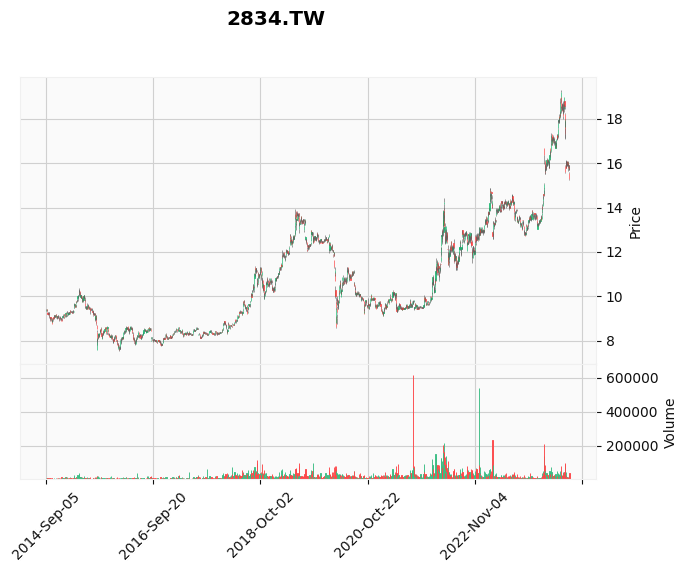

In [13]:
# 1. 篩選「臺企銀」的資料 (證券代碼: 2834 臺企銀)
taiqi_bank = df1[df1['證券代碼'] == '2834 臺企銀'].copy()

# 2. 轉換日期格式，使用 .loc 來避免警告
taiqi_bank.loc[:, '年月日'] = pd.to_datetime(taiqi_bank['年月日'], format='%Y/%m/%d')

# 3. 按日期排序
taiqi_bank = taiqi_bank.sort_values(by='年月日')

# 4. 設定 DataFrame 格式符合 K 線圖的需求，並重命名列名稱
# 將日期作為索引，並將「開盤價」、「最高價」、「最低價」、「收盤價」這些欄位重命名為英文字
taiqi_bank_kline = taiqi_bank.set_index('年月日')[['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)', '成交量(千股)']]
taiqi_bank_kline.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# 5. 移除「成交量」中的逗號並轉換為整數
taiqi_bank_kline['Volume'] = taiqi_bank_kline['Volume'].apply(lambda x: int(str(x).replace(',', '')))

# 6. 繪製 K 線圖
import mplfinance as mpf

mpf.plot(taiqi_bank_kline,
         type='candle',           # 使用蠟燭圖類型
         volume=True,             # 加上成交量圖
         title='2834.TW',
         style='yahoo')           # 選擇樣式，可以試試其他樣式，例如 'classic', 'yahoo', 'charles'


## 三個月之K線

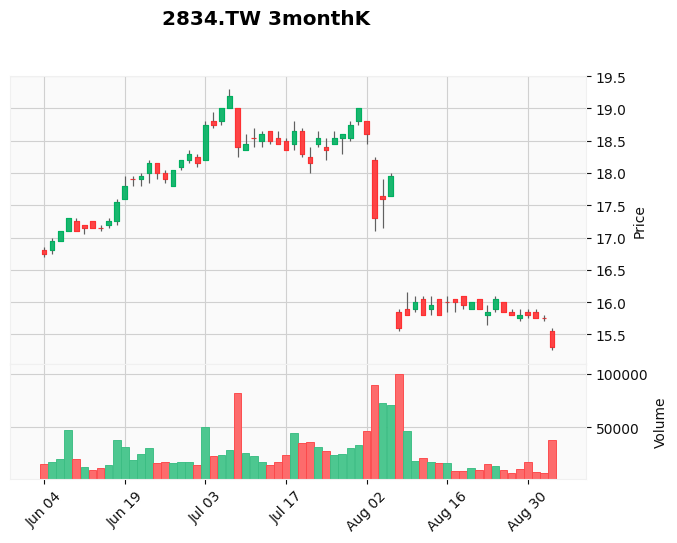

In [15]:
from datetime import datetime, timedelta

# 1. 篩選「臺企銀」的資料 (證券代碼: 2834 臺企銀)
taiqi_bank = df1[df1['證券代碼'] == '2834 臺企銀'].copy()

# 2. 轉換日期格式，使用 .loc 來避免警告
taiqi_bank.loc[:, '年月日'] = pd.to_datetime(taiqi_bank['年月日'], format='%Y/%m/%d')

# 3. 按日期排序
taiqi_bank = taiqi_bank.sort_values(by='年月日')

# 4. 篩選最近三個月的數據
end_date = taiqi_bank['年月日'].max()
start_date = end_date - pd.DateOffset(months=3)
taiqi_bank_recent = taiqi_bank[(taiqi_bank['年月日'] >= start_date) & (taiqi_bank['年月日'] <= end_date)]

# 5. 設定 DataFrame 格式符合 K 線圖的需求，並重命名列名稱
# 將日期作為索引，並將「開盤價」、「最高價」、「最低價」、「收盤價」這些欄位重命名為英文字
taiqi_bank_kline = taiqi_bank_recent.set_index('年月日')[['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)', '成交量(千股)']]
taiqi_bank_kline.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# 6. 移除「成交量」中的逗號並轉換為整數
taiqi_bank_kline['Volume'] = taiqi_bank_kline['Volume'].apply(lambda x: int(str(x).replace(',', '')))

# 7. 繪製 K 線圖
mpf.plot(taiqi_bank_kline,
         type='candle',           # 使用蠟燭圖類型
         volume=True,             # 加上成交量圖
         title='2834.TW 3monthK',
         style='yahoo')           # 選擇樣式，可以試試其他樣式，例如 'classic', 'yahoo', 'charles'


## 將MA設置為function以便未來呼叫使用

In [23]:
import pandas as pd
import mplfinance as mpf

def plot_kline_with_ma(df, stock_code, months=3, ma_period=5):
    """
    繪製指定股票的K線圖和指定的移動平均線。

    參數:
    - df: 完整的價格資料 (DataFrame)
    - stock_code: 股票的證券代碼 (如 '2834 臺企銀')
    - months: 要顯示的最近幾個月 (預設為 3 個月)
    - ma_period: 移動平均線的期間 (預設為 5 日均線)
    """
    # 1. 篩選指定股票的資料
    stock_data = df[df['證券代碼'] == stock_code].copy()

    # 2. 轉換日期格式
    stock_data.loc[:, '年月日'] = pd.to_datetime(stock_data['年月日'], format='%Y/%m/%d')

    # 3. 按日期排序
    stock_data = stock_data.sort_values(by='年月日')

    # 4. 篩選最近指定月份的數據
    end_date = stock_data['年月日'].max()
    start_date = end_date - pd.DateOffset(months=months)
    stock_data_recent = stock_data[(stock_data['年月日'] >= start_date) & (stock_data['年月日'] <= end_date)]

    # 5. 設定 DataFrame 格式符合 K 線圖的需求，並重命名列名稱
    stock_data_kline = stock_data_recent.set_index('年月日')[['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)', '成交量(千股)']]
    stock_data_kline.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

    # 6. 移除「成交量」中的逗號並轉換為整數
    stock_data_kline['Volume'] = stock_data_kline['Volume'].apply(lambda x: int(str(x).replace(',', '')))

    # 7. 計算移動平均線
    stock_data_kline[f'MA_{ma_period}'] = stock_data_kline['Close'].rolling(window=ma_period).mean()

    # 8. 繪製 K 線圖並加上移動平均線
    mpf.plot(stock_data_kline,
             type='candle',           # 使用蠟燭圖類型
             mav=(ma_period),         # 移動平均線的天數
             volume=True,             # 加上成交量圖
             title=f'{stock_code} {months}months {ma_period}days K',
             style='yahoo')           # 選擇樣式，可以試試其他樣式，例如 'classic', 'yahoo', 'charles'


##試用function

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33274 (\N{CJK UNIFIED IDEOGRAPH-81FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20225 (\N{CJK UNIFIED IDEOGRAPH-4F01}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37504 (\N{CJK UNIFIED IDEOGRAPH-9280}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


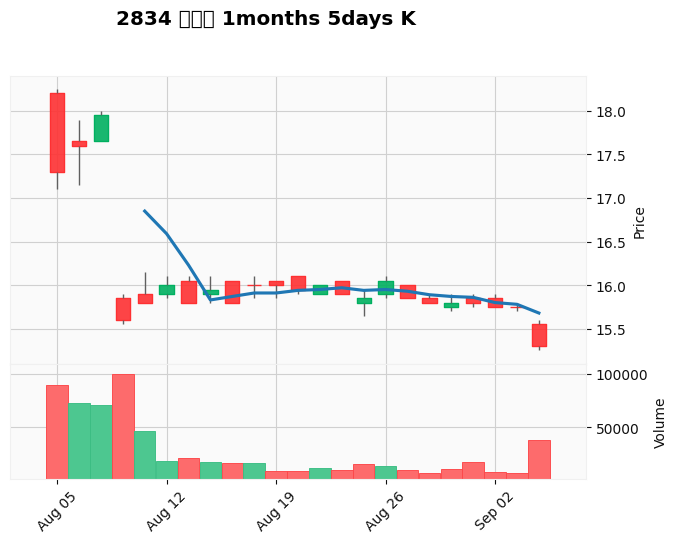

In [25]:
# 呼叫函式，繪製臺企銀最近3個月的K線圖和5日均線
plot_kline_with_ma(df1, '2834 臺企銀', months=1, ma_period=5)